## 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

## 데이터 로드

In [2]:
X_train, X_test, Y_train, Y_test = np.load('/content/drive/MyDrive/python/dl/prj02/datasets/books_data_nouns_max_710_size_62859.npy', allow_pickle=True)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(52547, 710) (5839, 710) (52547, 8) (5839, 8)


## 모델생성

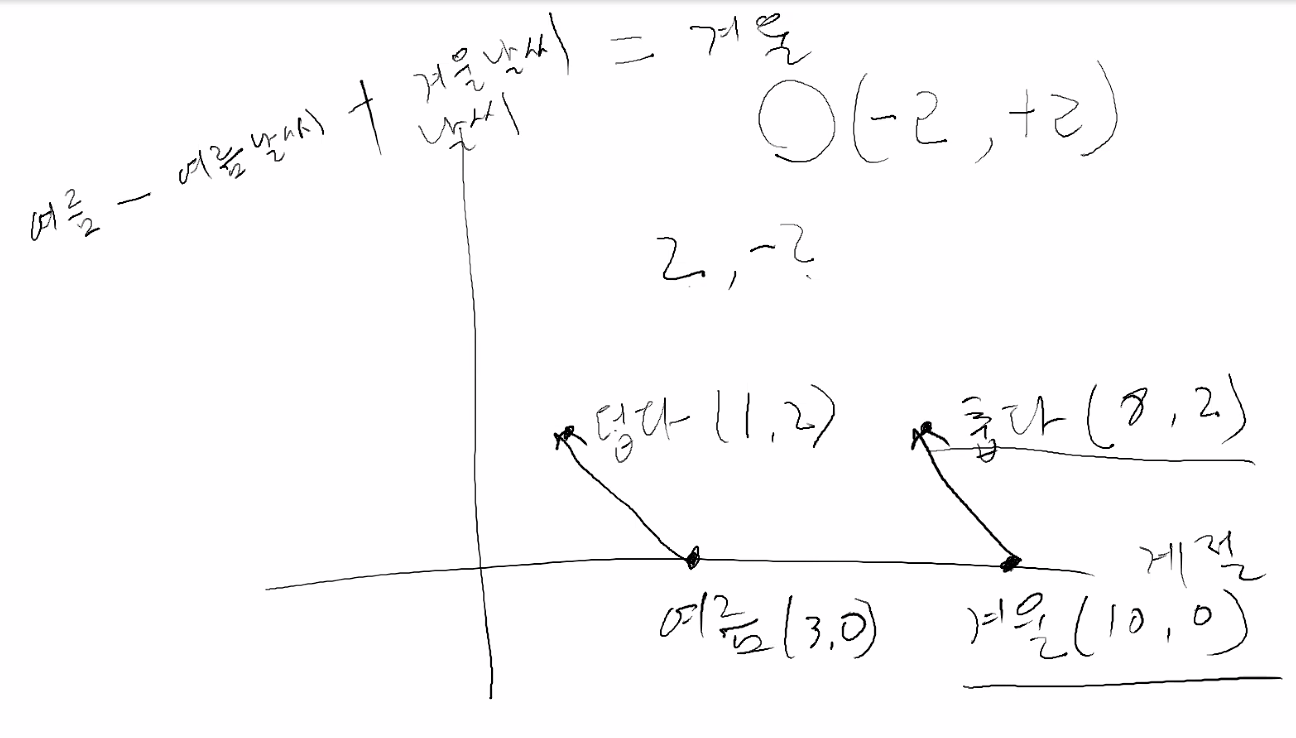

In [3]:
model = Sequential()
model.add(Embedding(input_dim=62859,   # 단어들을 벡터공간에 배치 / 의미상 유사한 단어들은 가까운 지점으로 매핑 / 연산 가능해짐 / 복잡하고 연산량 많음
                    output_dim=300,  # 차원 축소 / 데이터 학습을 위해 차원이 증가하면서 학습데이터 수가 차원의 수보다 적어져 성능이 저하 -> 차원의 저주
                    input_length=710))  # CNN의 input_shape과 같음
model.add(Conv1D(32, kernel_size=7, padding='same', activation='relu'))  # 주변 값과의 연관성을 분석하기 위해 사용
model.add(MaxPool1D(pool_size=1))  # 그냥 Conv 친구라 ㅎㅎ
model.add(LSTM(64, activation='tanh'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 710, 300)          18857700  
_________________________________________________________________
conv1d (Conv1D)              (None, 710, 32)           67232     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 710, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4

## 모델 학습

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
fit_hist = model.fit(X_train, Y_train, batch_size=512, epochs=8, validation_data=(X_test, Y_test))

Epoch 1/8
103/103 [==============================] - 52s 457ms/step - loss: 1.2928 - accuracy: 0.5231 - val_loss: 0.5370 - val_accuracy: 0.8346
Epoch 2/8
103/103 [==============================] - 46s 445ms/step - loss: 0.4217 - accuracy: 0.8844 - val_loss: 0.3851 - val_accuracy: 0.8897
Epoch 3/8
103/103 [==============================] - 46s 445ms/step - loss: 0.2427 - accuracy: 0.9387 - val_loss: 0.3830 - val_accuracy: 0.8966
Epoch 4/8
103/103 [==============================] - ETA: 0s - loss: 0.1654 - accuracy: 0.9588

## 모델 검증 및 저장

In [ ]:
score = model.evaluate(X_test, Y_test)
print(score[1])

In [ ]:
model.save(f'/content/drive/MyDrive/python/dl/prj02/models/news_classification_{score[1]:.4f}.h5')